1) Preprocessing :
Features (X) shape: (569, 30)
Target (y) shape: (569,)
2) Data Split and Standardization:
Training set size: 455
Testing set size: 114
3) Model Training :
Logistic Regression model has been successfully trained.
4) Model Evaluation : 


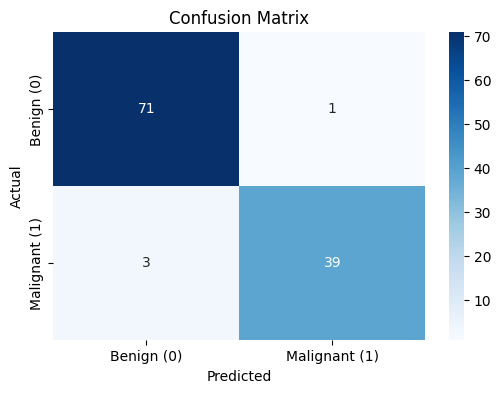


Classification Report
               precision    recall  f1-score   support

   Benign (0)       0.96      0.99      0.97        72
Malignant (1)       0.97      0.93      0.95        42

     accuracy                           0.96       114
    macro avg       0.97      0.96      0.96       114
 weighted avg       0.97      0.96      0.96       114


ROC-AUC Score
Area Under the Curve (AUC): 0.9960


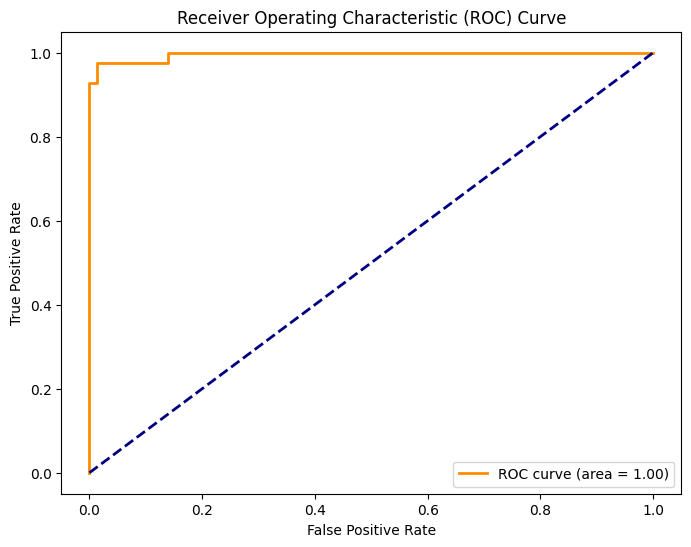

5) Threshold Tuning:
Default threshold is 0.5. Let's try a new threshold of 0.3.
This can increase recall (finding more malignant cases) at the cost of precision.

Classification Report with New Threshold (0.3) ---
               precision    recall  f1-score   support

   Benign (0)       0.99      0.99      0.99        72
Malignant (1)       0.98      0.98      0.98        42

     accuracy                           0.98       114
    macro avg       0.98      0.98      0.98       114
 weighted avg       0.98      0.98      0.98       114



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score, roc_curve)

df = pd.read_csv('data.csv')

df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

#Convert 'diagnosis' from text ('M'/'B') to numbers (1/0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print("1) Preprocessing :")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("2) Data Split and Standardization:")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

print("3) Model Training :")
print("Logistic Regression model has been successfully trained.")




y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]


print("4) Model Evaluation : ")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malignant (1)'], yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report")
print(classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)']))


roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

print(f"\nROC-AUC Score")
print(f"Area Under the Curve (AUC): {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




print("5) Threshold Tuning:")
print("Default threshold is 0.5. Let's try a new threshold of 0.3.")
print("This can increase recall (finding more malignant cases) at the cost of precision.")

new_threshold = 0.3
y_pred_new_threshold = (y_pred_proba >= new_threshold).astype(int)

print(f"\nClassification Report with New Threshold ({new_threshold}) ---")
print(classification_report(y_test, y_pred_new_threshold, target_names=['Benign (0)', 'Malignant (1)']))